<a href="https://colab.research.google.com/github/NaFi99/ML-Image-Recognition/blob/main/Skripsi_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=VCHNh3cMsRE

https://github.com/theclassofai/Multiclass_Image_Classification/blob/main/Multiclass_Classification_CNN_DataAug.ipynb

In [ ]:
#run
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import os
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/Skripsi/mycloud')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Skripsi/mycloud"))
file_count = len(files)
print(file_count)

['cb', 'ns', 'st', 'cu', 'sc']
0


In [ ]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/Skripsi/mycloud'
#base_dir = '/content/drive/MyDrive/Skripsi/cloud_data'
base_dir = '/content/drive/MyDrive/Skripsi/cloud_data60'
#os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)


In [ ]:
#Under train folder create five folders 


train_cb_dir = os.path.join(train_dir, 'cumulonimbus')
#os.mkdir(train_cb_dir)

train_cu_dir = os.path.join(train_dir, 'cumulus')
#os.mkdir(train_cu_dir)

train_st_dir = os.path.join(train_dir, 'stratus')
#os.mkdir(train_st_dir)

train_sc_dir = os.path.join(train_dir, 'stratocumulus')
#os.mkdir(train_sc_dir)

train_ns_dir = os.path.join(train_dir, 'nimbostratus')
#os.mkdir(train_ns_dir)

#Under validation folder create five folders 


validation_cb_dir = os.path.join(validation_dir, 'cumulonimbus')
#os.mkdir(validation_cb_dir)

validation_cu_dir = os.path.join(validation_dir, 'cumulus')
#os.mkdir(validation_cu_dir)

validation_st_dir = os.path.join(validation_dir, 'stratus')
#os.mkdir(validation_st_dir)

validation_sc_dir = os.path.join(validation_dir, 'stratocumulus')
#os.mkdir(validation_sc_dir)

validation_ns_dir = os.path.join(validation_dir, 'nimbostratus')
#os.mkdir(validation_ns_dir)

In [ ]:
#run
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
#run
CB_SOURCE_DIR = '/content/drive/MyDrive/Skripsi/mycloud/cb/'
#TRAINING_CB_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/train/cumulonimbus/'
#VALID_CB_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/validation/cumulonimbus/'
TRAINING_CB_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/train/cumulonimbus/'
VALID_CB_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/validation/cumulonimbus/'

CU_SOURCE_DIR = '/content/drive/MyDrive/Skripsi/mycloud/cu/'
#TRAINING_CU_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/train/cumulus/'
#VALID_CU_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/validation/cumulus/'
TRAINING_CU_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/train/cumulus/'
VALID_CU_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/validation/cumulus/'

NS_SOURCE_DIR = '/content/drive/MyDrive/Skripsi/mycloud/ns/'
#TRAINING_NS_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/train/nimbostratus/'
#VALID_NS_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/validation/nimbostratus/'
TRAINING_NS_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/train/nimbostratus/'
VALID_NS_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/validation/nimbostratus/'

SC_SOURCE_DIR = '/content/drive/MyDrive/Skripsi/mycloud/sc/'
#TRAINING_SC_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/train/stratocumulus/'
#VALID_SC_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/validation/stratocumulus/'
TRAINING_SC_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/train/stratocumulus/'
VALID_SC_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/validation/stratocumulus/'

ST_SOURCE_DIR = '/content/drive/MyDrive/Skripsi/mycloud/st/'
#TRAINING_ST_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/train/stratus/'
#VALID_ST_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/validation/stratus/'
TRAINING_ST_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/train/stratus/'
VALID_ST_DIR = '/content/drive/MyDrive/Skripsi/cloud_data60/validation/stratus/'

In [ ]:
#run
import os
import numpy as np 
import pandas as pd
import seaborn as sn
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
'''
import random
from shutil import copyfile

split_size = .60

split_data(CB_SOURCE_DIR, TRAINING_CB_DIR, VALID_CB_DIR, split_size)
split_data(CU_SOURCE_DIR, TRAINING_CU_DIR, VALID_CU_DIR, split_size)
split_data(NS_SOURCE_DIR, TRAINING_NS_DIR, VALID_NS_DIR, split_size)
split_data(SC_SOURCE_DIR, TRAINING_SC_DIR, VALID_SC_DIR, split_size)
split_data(ST_SOURCE_DIR, TRAINING_ST_DIR, VALID_ST_DIR, split_size)

'''

'\nimport random\nfrom shutil import copyfile\n\nsplit_size = .60\n\nsplit_data(CB_SOURCE_DIR, TRAINING_CB_DIR, VALID_CB_DIR, split_size)\nsplit_data(CU_SOURCE_DIR, TRAINING_CU_DIR, VALID_CU_DIR, split_size)\nsplit_data(NS_SOURCE_DIR, TRAINING_NS_DIR, VALID_NS_DIR, split_size)\nsplit_data(SC_SOURCE_DIR, TRAINING_SC_DIR, VALID_SC_DIR, split_size)\nsplit_data(ST_SOURCE_DIR, TRAINING_ST_DIR, VALID_ST_DIR, split_size)\n\n'

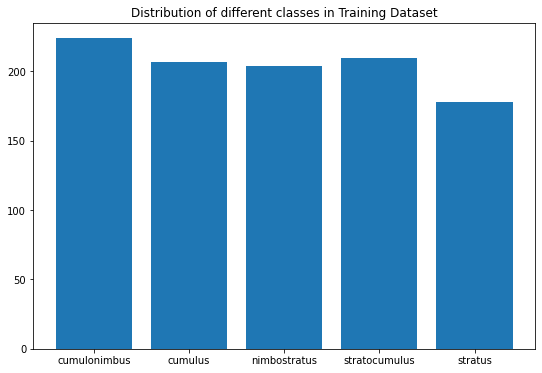

In [ ]:
#run
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Skripsi/cloud_data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Skripsi/cloud_data/train/'+i+'/'))))

Training cumulonimbus images are: 224
Training cumulus images are: 207
Training nimbostratus images are: 204
Training stratocumulus images are: 210
Training stratus images are: 178


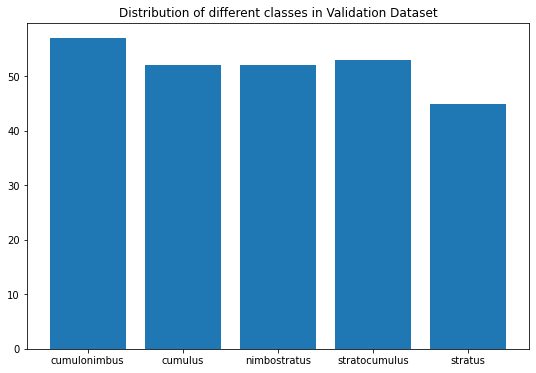

In [ ]:
image_folder = ['cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Skripsi/cloud_data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Skripsi/cloud_data/validation/'+i+'/'))))

Valid cumulonimbus images are: 57
Valid cumulus images are: 52
Valid nimbostratus images are: 52
Valid stratocumulus images are: 53
Valid stratus images are: 45


In [ ]:
#run
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import itertools
import math 
import datetime
import time

In [ ]:
#run
#img_width=500; img_height=500
img_width=250; img_height=250
#img_width=150; img_height=150
#img_width=100; img_height=100

#batch_size=8
batch_size=16
#batch_size=32
#batch_size=64
#Number of items from the data to takes the training model. If you use the batch size of one you update weights after every sample. If you use batch size 32, you calculate the average error and then update weights every 32 items.

In [ ]:

TRAINING_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/train/'

train_datagen = ImageDataGenerator(rescale= 1/255.0,
                                   rotation_range= 30,
                                   zoom_range= 0.2,
                                   shear_range= 0.2,
                                   fill_mode= 'nearest',
                                   horizontal_flip= True
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))


Found 1023 images belonging to 5 classes.


In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/Skripsi/cloud_data/validation/'

validation_datagen = ImageDataGenerator(rescale= 1/255.0
                                        )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 259 images belonging to 5 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/Skripsi/best_model60.h5'
metric = 'val_accuracy'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
input_shape=(img_height, img_width, 3)
tf_model = tf.keras.applications.ResNet50V2(
    input_shape=input_shape,
    include_top=False
)

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
model = Sequential([
    #tf_model,
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),


    Flatten(), 
    Dense(64, activation='relu'),
    Dropout(0.50),

    Dense(5, activation='softmax')
])
#model.build(input_shape)
#model.summary()

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
start = datetime.datetime.now()
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks]
                              )


Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 1.6764 - accuracy: 0.2778
Epoch 1: val_accuracy improved from -inf to 0.36680, saving model to /content/drive/MyDrive/Skripsi/best_model60.h5
50/50 [==============================] - 22s 432ms/step - loss: 1.6764 - accuracy: 0.2778 - val_loss: 1.5379 - val_accuracy: 0.3668
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 1.4766 - accuracy: 0.3450
Epoch 2: val_accuracy improved from 0.36680 to 0.43629, saving model to /content/drive/MyDrive/Skripsi/best_model60.h5
50/50 [==============================] - 23s 453ms/step - loss: 1.4766 - accuracy: 0.3450 - val_loss: 1.4169 - val_accuracy: 0.4363
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 1.4674 - accuracy: 0.3575
Epoch 3: val_accuracy improved from 0.43629 to 0.44402, saving model to /content/drive/MyDrive/Skripsi/best_model60.h5
50/50 [==============================] - 23s 452ms/step - loss: 1.4674 - accuracy: 0.3575 - val_l

1 - low accuracy and big loss means you made huge errors on a lot of data

2 - low accuracy but small loss means you made little errors on a lot of data

3 - high accuracy with small loss means you made low errors on a few data (best case)

4 - high accuracy but a big loss, means you made huge errors on a few data.

high training accuracy and very low validation then this case is probably known as over-fitting.


In [ ]:

(val_loss, val_accuracy) = model.evaluate(
    validation_generator, 
    batch_size=batch_size, 
    verbose=1)

print('[INFO] accuracy: {:.2f}%'.format(val_accuracy * 100)) 
print('[INFO] Loss: {:.2f}%'.format(val_loss)) 
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)


17/17 [==============================] - 3s 157ms/step - loss: 1.3069 - accuracy: 0.4749
[INFO] accuracy: 47.49%
[INFO] Loss: 1.31%
Time:  0:49:21.383017


In [ ]:

(train_loss, train_accuracy) = model.evaluate(
    train_generator, 
    batch_size=batch_size, 
    verbose=1)

print('[INFO] accuracy: {:.2f}%'.format(train_accuracy * 100)) 
print('[INFO] Loss: {:.2f}%'.format(train_loss)) 
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)


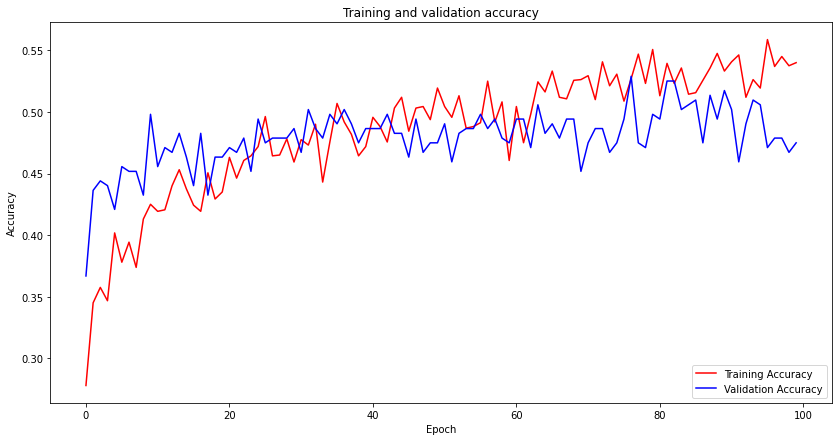

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss')

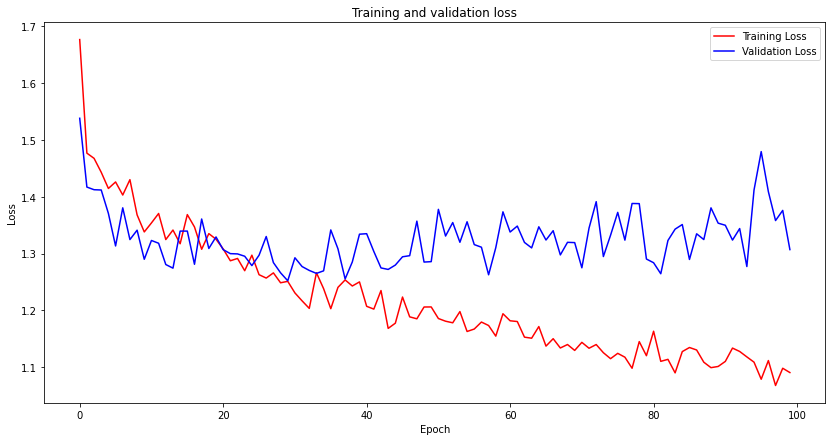

In [ ]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict_generator(validation_generator)
pred = np.argmax(predict, axis=1)
cm = confusion_matrix(validation_generator.classes,pred)

def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues) :

      if normalize:
          cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] 
          print('Normalized confusion matrix')
   
      else: print('Confusion matrix, without normalization') 
        
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=45)
      plt.yticks(tick_marks, classes)
 
      fmt = '.2f' if normalize else 'd'
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label') 

print("========= CONFUSION MATRIX =========")
print(cm)

print("============== RESULT ==============")
print(classification_report(validation_generator.classes,pred))

plot_confusion_matrix(cm, ['Cumulonimbus', 'Cumulus', 'Nimbostratus', 'Stratocumulus', 'Stratus'], normalize = True)

In [ ]:
model = load_model(best_model_file)

In [ ]:

%matplotlib inline
uploaded = files.upload()
for fn in uploaded.keys():
       path = fn
       img = image.load_img(path, target_size=(img_width,img_height))
       imgplot = plt.imshow(img)
       x = image.img_to_array(img)
       x = np.expand_dims(x, axis=0)
       x = x/255
       images = np.vstack([x])
       classes = model.predict(images, batch_size=16)

       print(fn)
       print(classes)
       if np.argmax(classes[0]) == 0:
         print('Cumulonimbus')
         
       elif np.argmax(classes[0]) == 1:
        print('Cumulus')
        
       elif np.argmax(classes[0]) == 2:
        print('Nimbostratus')
       
       elif np.argmax(classes[0]) == 3:
        print('Stratocumulus')
        
       else:
          print('Stratus')





https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa
https://github.com/Laurnh/poundcake/blob/master/classifier/cnn_confusion-matrix.py
https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model

https://machinelearningmastery.com/overfitting-machine-learning-models/ overfit

https://analyticsindiamag.com/everything-you-should-know-about-dropouts-and-batchnormalization-in-cnn/ dropout
https://keras.io/api/layers/regularizers/ regularization

https://data-flair.training/blogs/transfer-learning/ transfer learning
https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce

Inception 
https://iq.opengenus.org/inception-pre-trained-cnn-model/

https://iq.opengenus.org/inception-v3-model-architecture/#:~:text=The%20Inception%20V3%20is%20a%20deep%20learning%20model,it%20was%20developed%20by%20a%20team%20at%20Google.

https://medium.com/@AnasBrital98/inception-v3-cnn-architecture-explained-691cfb7bba08

Spkit 60:40
https://towardsdatascience.com/data-splitting-technique-to-fit-any-machine-learning-model-c0d7f3f1c790

Bang Yahyung
https://github.com/ndawinata/CNN_Django_Yajyung/blob/master/mysite/cnn.py

Hasilku masih overfit. jadi antara jumlah validasinya terlalu rendah, layer kurang dalam, atau preprocessing kurang.

Cara mengurangi overfit adalah mengurangi weight.
Change network complexity by changing the network structure (number of weights).
Change network complexity by changing the network parameters (values of weights)

Kedalaman layer atau parameter

- Augmenting the training set
- Applying other regularization techniques like dropout or early stopping (one at a time)
- A pre-trained CNNs(like ResNet-50) if you haven't



